In [1]:
! pip install 'cebra[dev,demos]' 

/Users/brian.gitahi/Desktop/AIND/CEBRA/CEBRA-Analysis/cebraenv/bin/pip: line 2: /Users/brian.gitahi/Desktop/AIND/CEBRA Analysis/CEBRA13/cebraenv/bin/python: No such file or directory
/Users/brian.gitahi/Desktop/AIND/CEBRA/CEBRA-Analysis/cebraenv/bin/pip: line 2: exec: /Users/brian.gitahi/Desktop/AIND/CEBRA Analysis/CEBRA13/cebraenv/bin/python: cannot execute: No such file or directory


In [2]:
import sys
import os # my addtion

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

from scipy.integrate import solve_ivp
import cebra.datasets
from cebra import CEBRA
import torch
import d_library as dl


/Users/brian.gitahi/Desktop/AIND/CEBRA/CEBRA-Analysis/cebraenv/lib/python3.11/site-packages/cebra/datasets/__init__.py:103: UserWarning: Could not initialize one or more datasets: No module named 'h5py'. For using the datasets, consider installing the [datasets] extension via pip.
  warnings.warn(f"Could not initialize one or more datasets: {e}. "


array([0., 0., 0., 0., 0.])

(array([0.2, 0.1, 0.4, 0.2, 0.1, 0.2]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

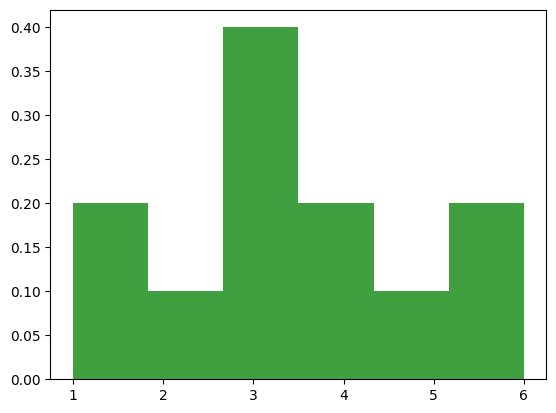

In [39]:
w = np.array([3,3,3,1,4,6,6])
v = np.array([1,2,3,4,5])


b = np.concatenate((w,v),axis=0)
bins = np.size(np.unique(b))


plt.hist(b,6,density=True, facecolor='green', alpha=0.75)

In [36]:
np.size(np.unique(b))

6

## Lorenz Attractor Analysis

In this capsule, we will run a dimension reduction analysis on the lorenz attractor.

In [3]:
# set max iterations
iterations = 1000

In [4]:
# Make a function to build a model, train it and then compute an embedding

def get_embed(input, dimension=3):

    # build CEBRA time model
    model = CEBRA(model_architecture='offset1-model',
                         batch_size=512,
                         learning_rate=0.01,
                         temperature=1,
                         output_dimension = int(dimension),
                         max_iterations=iterations,
                         distance='cosine',
                         conditional='time',
                         device='cuda_if_available',
                         num_hidden_units=64,
                         verbose=True,
                         time_offsets=1)

    model.fit(input)
    embedding = model.transform(input)


    return model, embedding


In [5]:
# define a function to make a lorenz system
def lorenz(t, xyz, sigma=10, rho=28, beta=8/3):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = rho * x - y - x * z
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [6]:
# Define parameters and initial conditions
sigma = 10
rho = 28
beta = 8/3
initial_conditions = [0, 2, 0]  # Initial conditions for [x, y, z]

# Time span for integration
t_span = [0, 35]

In [7]:
# Solve the differential equations
solution = solve_ivp(lorenz, t_span, initial_conditions, args=(sigma, rho, beta), dense_output=True)

# Generate time points for plotting
t = np.linspace(t_span[0], t_span[1], 10000)

In [8]:
# Evaluate the solution at the time points
xyz = solution.sol(t)

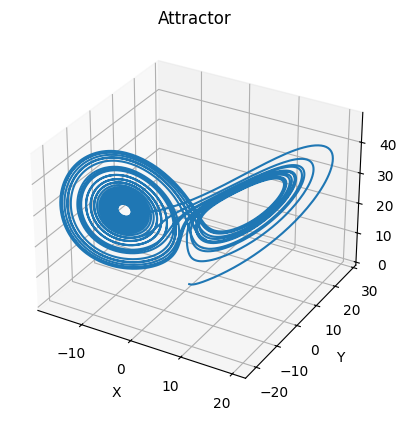

In [9]:
%matplotlib inline
# Plot the Lorenz attractor
def plot_lorenz(coords):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(coords[0], coords[1], coords[2], alpha=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Attractor')
    plt.show()


plot_lorenz(xyz)

In [23]:
# check the shape of the object
print(xyz.shape)
print(xyz[:,190])

(3, 10000)
[-6.60980422 -8.42031612 26.00175368]


In [11]:
new_lorenz = np.transpose(xyz)

In [21]:
print(new_lorenz.shape)
print(new_lorenz[190])

(10000, 3)
[-6.60980422 -8.42031612 26.00175368]


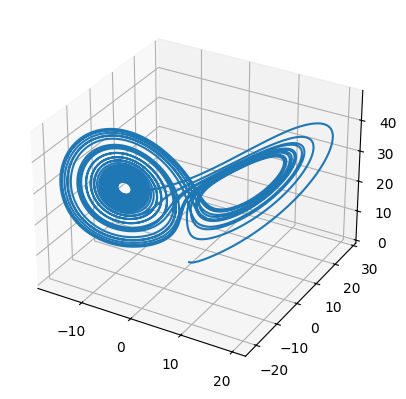

In [18]:
fig_ = plt.figure()
ax_ = fig_.add_subplot(111, projection='3d')
ax_.plot(new_lorenz[:,0], new_lorenz[:,1], new_lorenz[:,2], alpha=1)

In [11]:
# reshape it for use with cebra
lorenz_obj = xyz.reshape(10000,3)
lorenz_obj.shape

(10000, 3)

In [12]:
# now get embeddings with different output dimensions
model_l1, embed_l1 = get_embed(lorenz_obj, dimension=1)
model_l2, embed_l2 = get_embed(lorenz_obj, dimension=2)
model_l3, embed_l3 = get_embed(lorenz_obj, dimension=3)
model_l4, embed_l4 = get_embed(lorenz_obj, dimension=4)
model_l5, embed_l5 = get_embed(lorenz_obj, dimension=5)
model_l8, embed_l8 = get_embed(lorenz_obj, dimension=8)


pos: -0.9922 neg:  6.6740 total:  5.6818 temperature:  1.0000: 100%|██████████| 1000/1000 [00:10<00:00, 95.78it/s]
pos: -0.9974 neg:  6.4745 total:  5.4771 temperature:  1.0000: 100%|██████████| 1000/1000 [00:09<00:00, 102.68it/s]
pos: -0.9948 neg:  6.4045 total:  5.4097 temperature:  1.0000: 100%|██████████| 1000/1000 [00:09<00:00, 104.59it/s]
pos: -0.9930 neg:  6.3659 total:  5.3729 temperature:  1.0000: 100%|██████████| 1000/1000 [00:09<00:00, 101.44it/s]
pos: -0.9923 neg:  6.3425 total:  5.3502 temperature:  1.0000: 100%|██████████| 1000/1000 [00:10<00:00, 98.01it/s]
pos: -0.9913 neg:  6.3113 total:  5.3199 temperature:  1.0000: 100%|██████████| 1000/1000 [00:09<00:00, 102.05it/s]


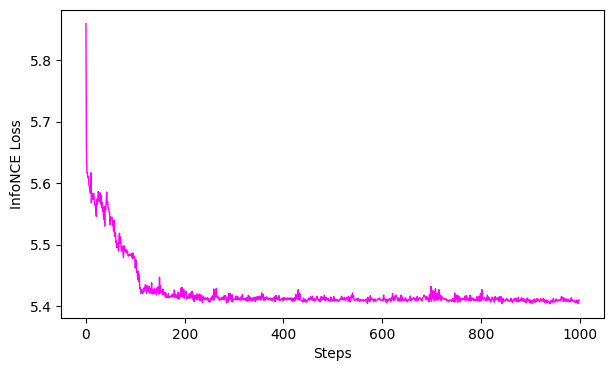

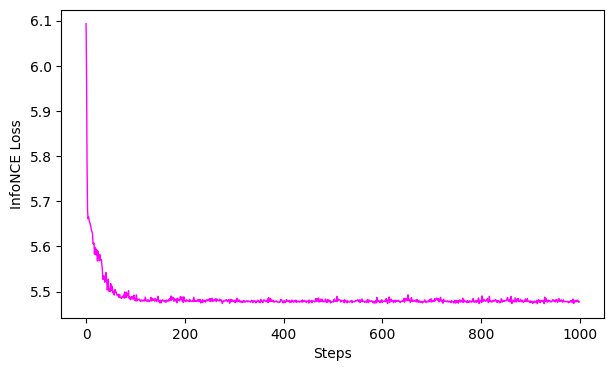

In [13]:
# display the loss of the models during training
ax = cebra.plot_loss(model_l3)
ax1 = cebra.plot_loss(model_l2)

<Axes: title={'center': 'Embedding'}>

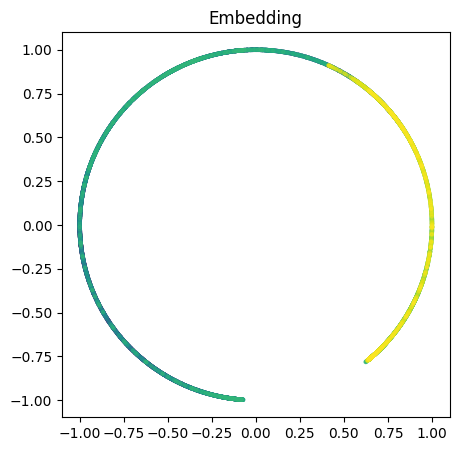

In [14]:
# Let's visualize them
cebra.plot_embedding(embedding=embed_l2, embedding_labels='time', markersize=5)

<Axes3D: title={'center': 'Embedding'}>

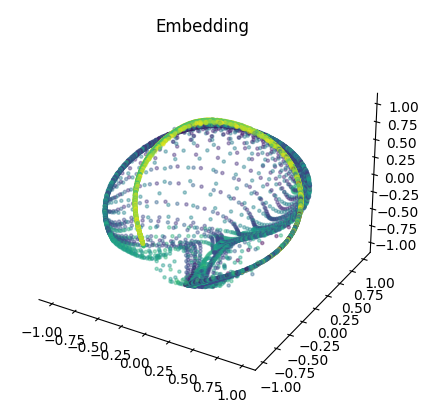

In [15]:
cebra.plot_embedding(embedding=embed_l3, embedding_labels='time', markersize=5)

<Axes3D: title={'center': 'Embedding'}>

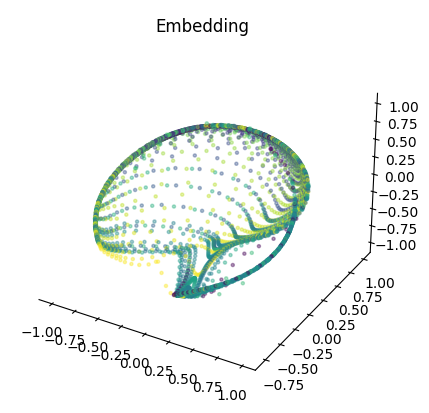

In [16]:
cebra.plot_embedding(embedding=embed_l3[0:5000,:], embedding_labels='time', markersize=5)

In [17]:
lorenz_input = [lorenz_obj]

In [18]:
# Create a grid of 2 rows and 3 columns
def embed_attractor(attractor):

   # get embeddings in 2D and 3D
   attractor_input = attractor.reshape(attractor.shape[1],attractor.shape[0])
   model_pl2, embed_pl2 = get_embed(attractor_input, dimension=2)
   model_pl3, embed_pl3 = get_embed(attractor_input, dimension=3)

   for i in range(0,attractor.shape[1],1000):

        attractor_p = attractor[:,0:i+1000]

        # define the grid
        gs = gridspec.GridSpec(2, 2, figure=plt.figure(figsize=(10,10)))

        # plot portion of attractor
        ax1 = plt.subplot(gs[0, :], projection='3d')  
        ax1.plot(attractor_p[0], attractor_p[1], attractor_p[2], alpha=1)
        plt.title('Timestep {}'.format(i+1000))

        # plot embeddings
        ax2 = plt.subplot(gs[1,0])
        cebra.plot_embedding(embedding=embed_pl2[0:i+1000,:], embedding_labels='time', markersize=5, ax=ax2, title='2D')
        ax3 = plt.subplot(gs[1,1], projection='3d')
        cebra.plot_embedding(embedding=embed_pl3[0:i+1000,:], embedding_labels='time', markersize=5,ax=ax3, title='3D')
        
        plt.show()


pos: -0.9958 neg:  6.4756 total:  5.4798 temperature:  1.0000: 100%|██████████| 1000/1000 [00:09<00:00, 101.61it/s]
pos: -0.9941 neg:  6.4032 total:  5.4090 temperature:  1.0000: 100%|██████████| 1000/1000 [00:10<00:00, 95.51it/s]


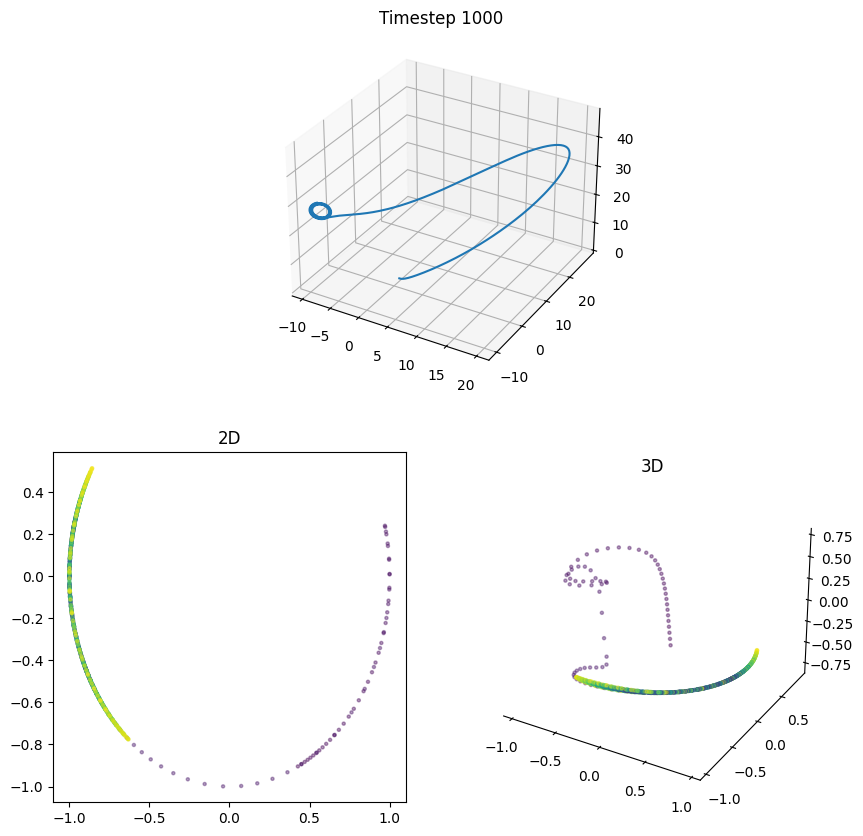

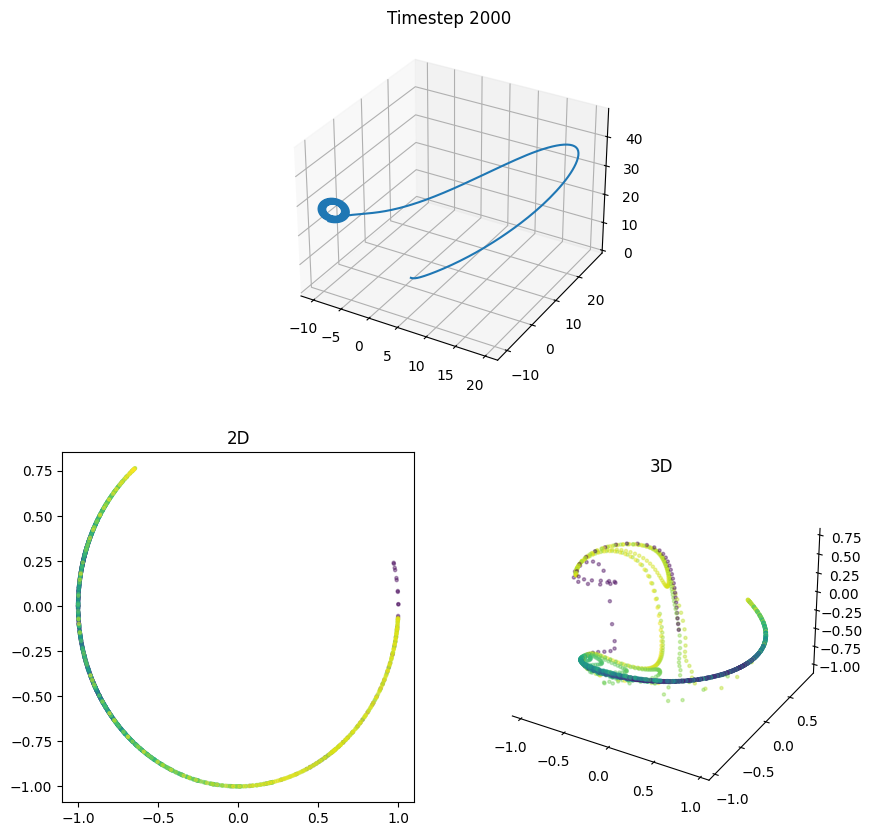

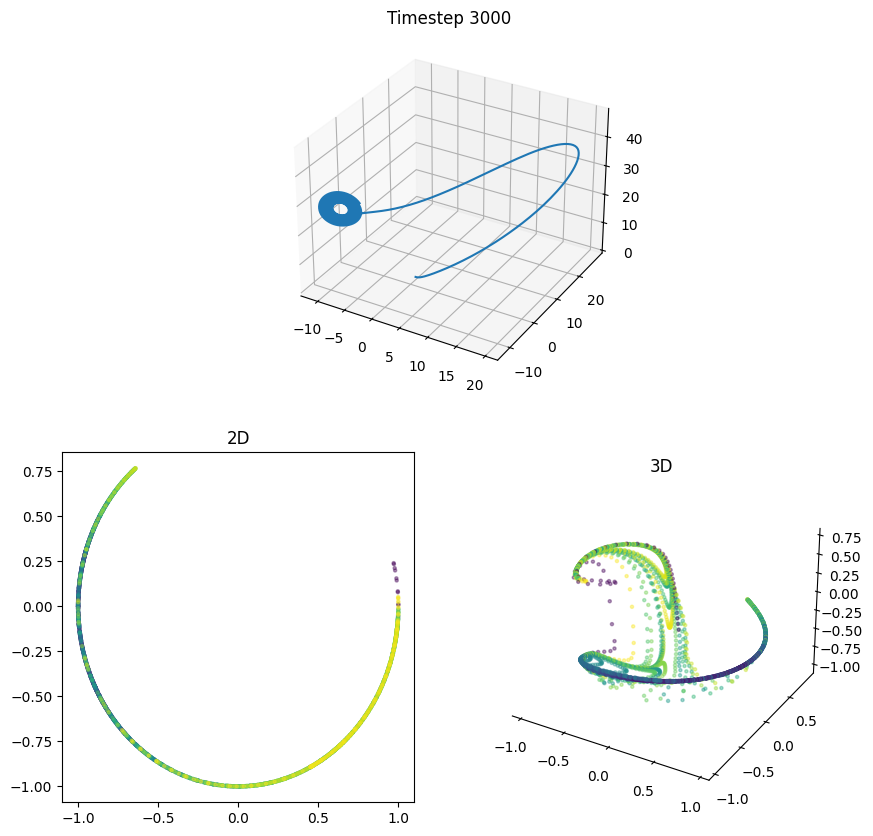

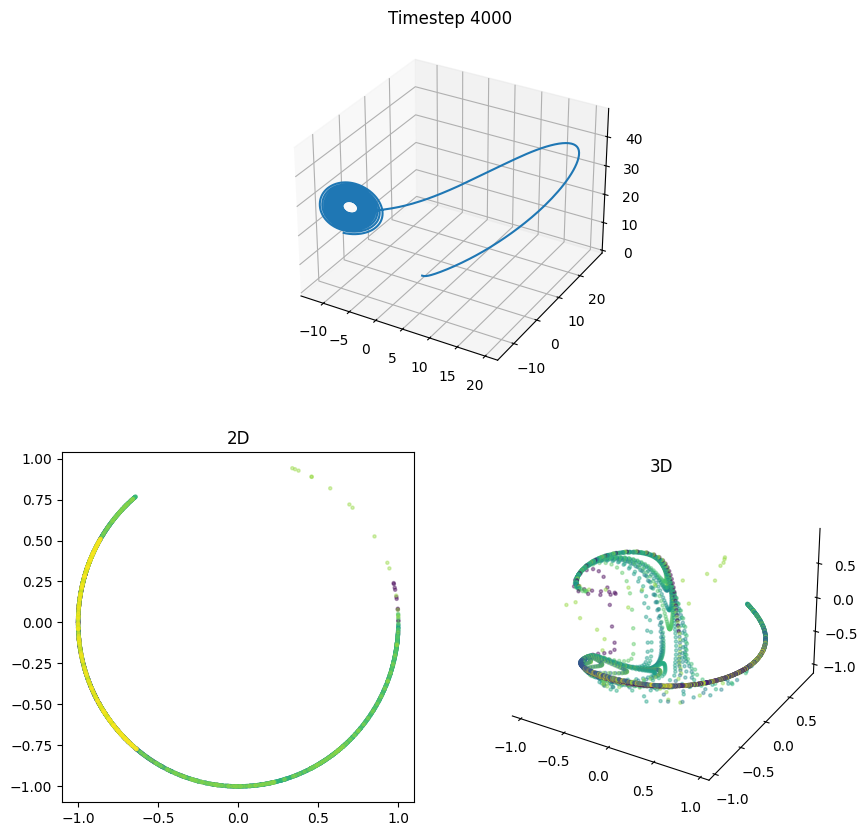

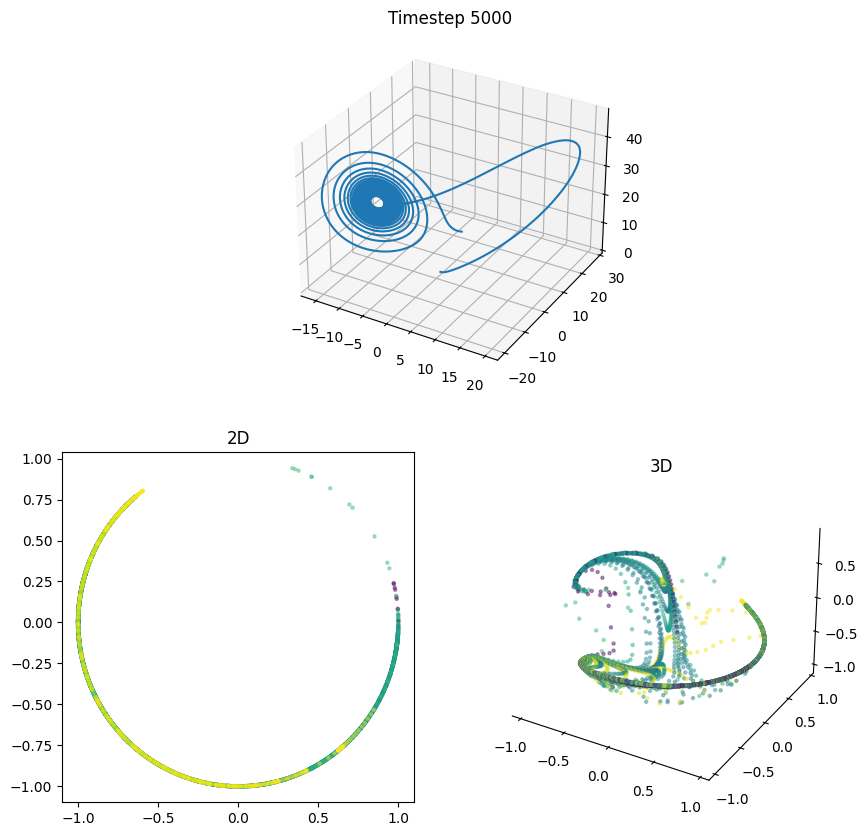

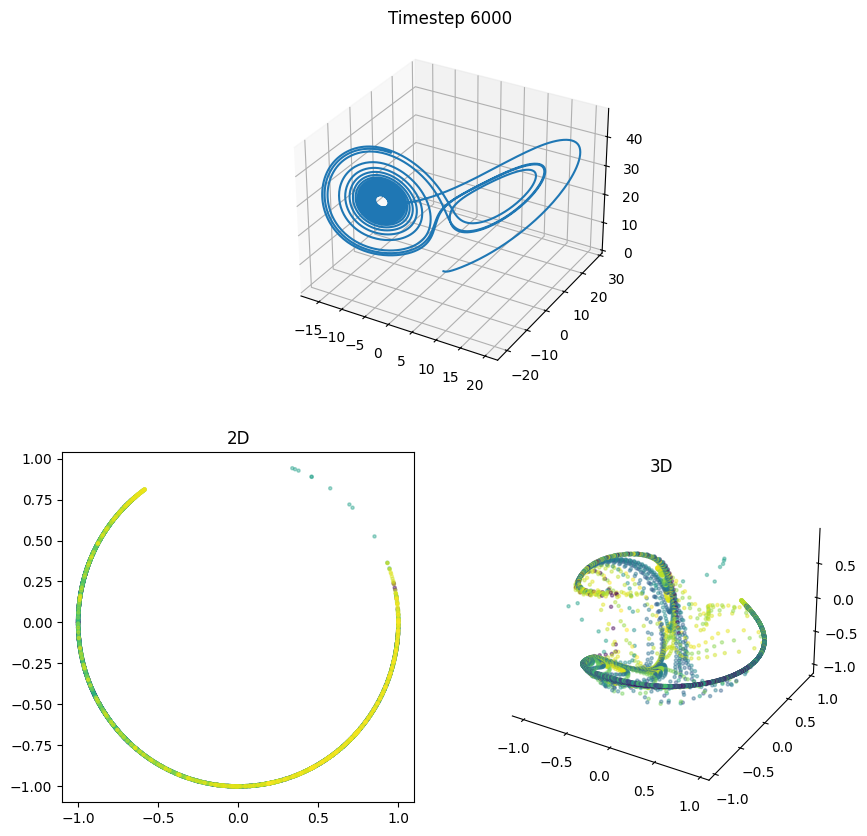

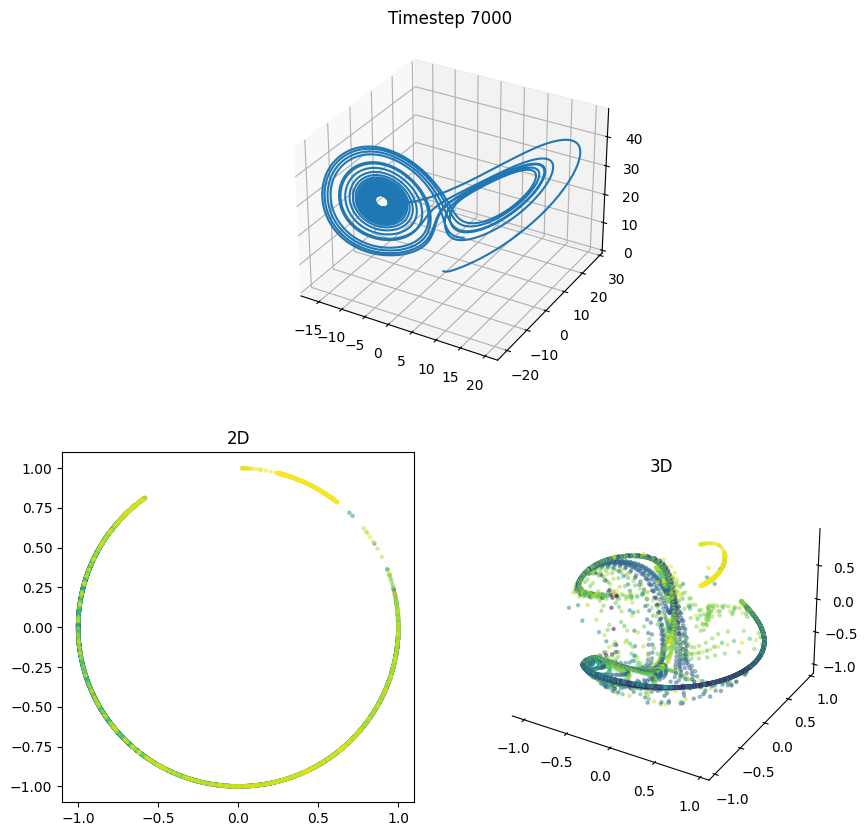

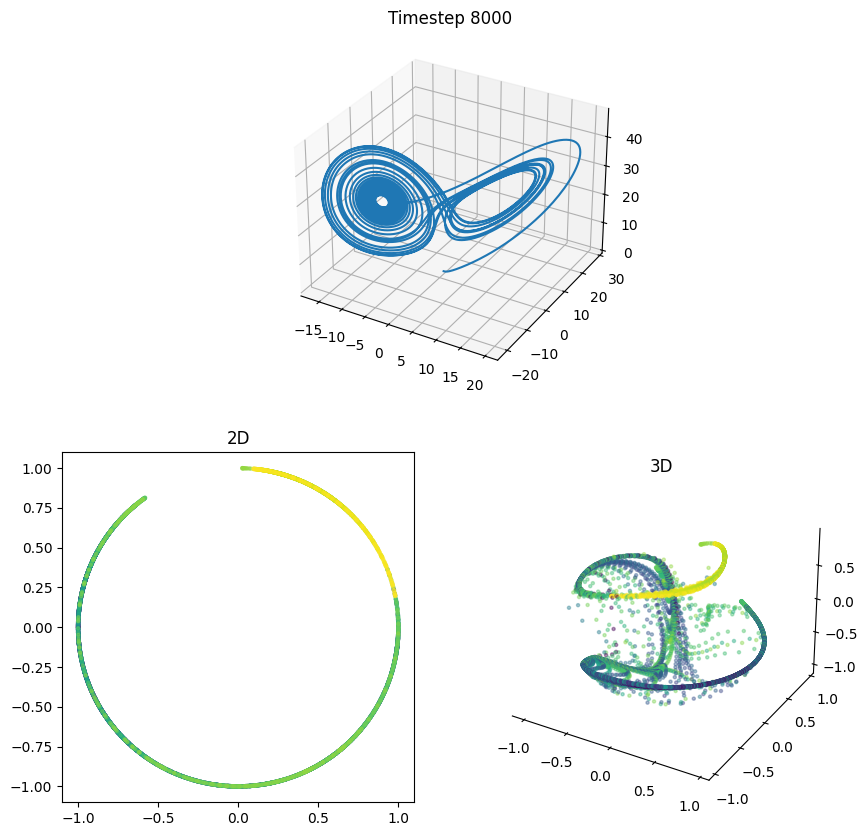

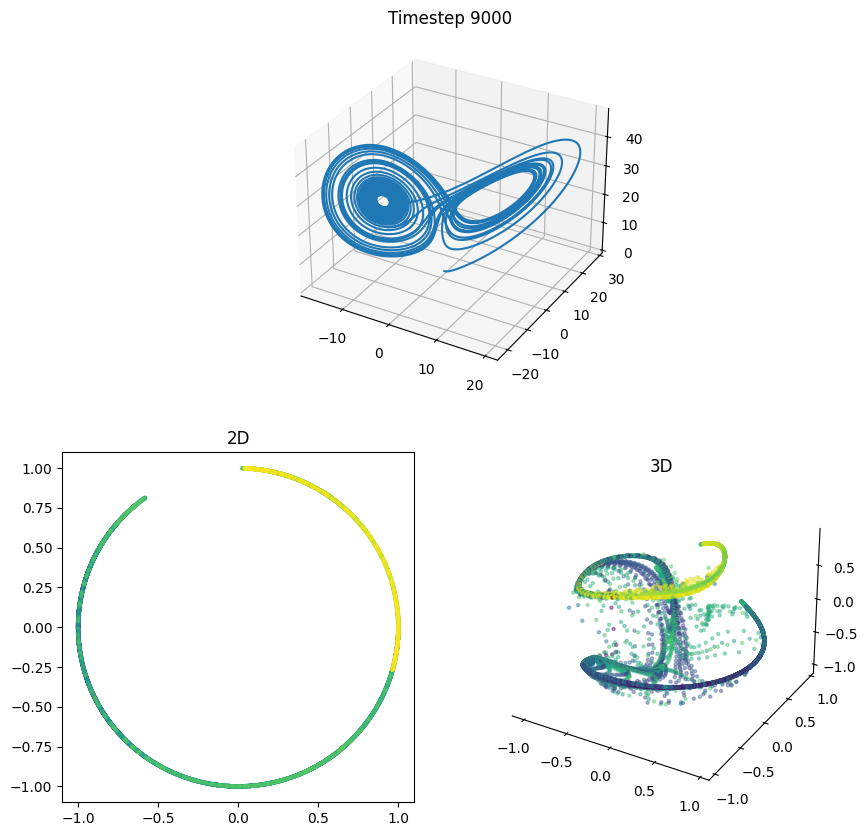

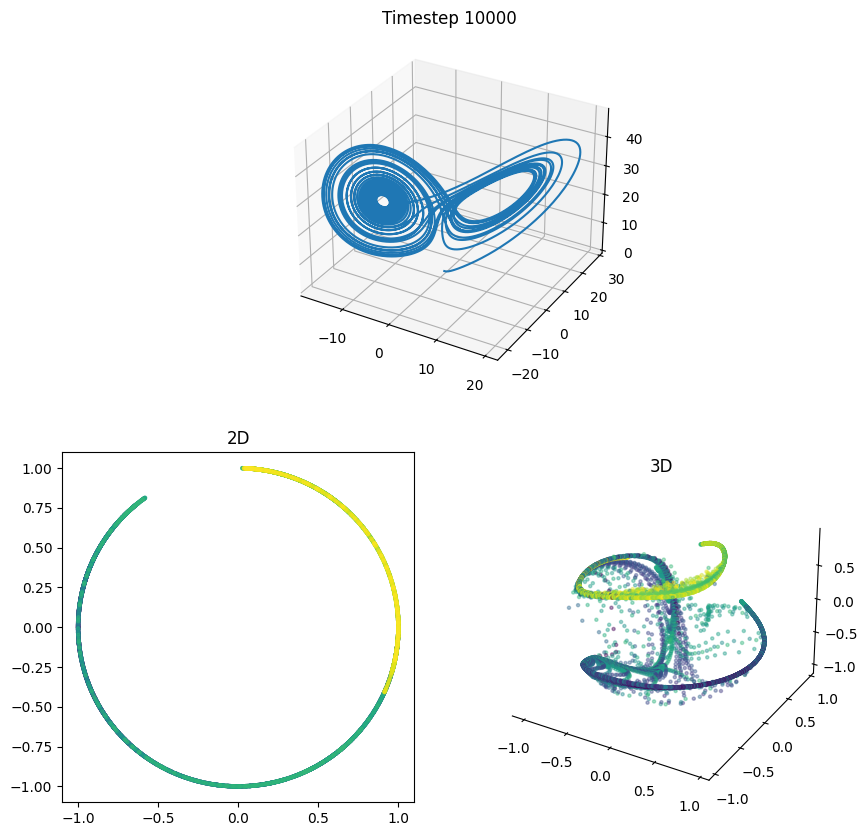

In [19]:
embed_attractor(xyz)

pos: -1.0000 neg:  6.6714 total:  5.6714 temperature:  1.0000: 100%|██████████| 1000/1000 [00:15<00:00, 62.53it/s]
pos: -0.9961 neg:  6.6718 total:  5.6757 temperature:  1.0000: 100%|██████████| 1000/1000 [00:14<00:00, 69.23it/s]
pos: -0.9844 neg:  7.1753 total:  6.1909 temperature:  1.0000: 100%|██████████| 1000/1000 [00:14<00:00, 71.12it/s]
pos: -0.9961 neg:  6.6708 total:  5.6747 temperature:  1.0000: 100%|██████████| 1000/1000 [00:14<00:00, 70.60it/s]
pos: -0.9805 neg:  6.6711 total:  5.6906 temperature:  1.0000: 100%|██████████| 1000/1000 [00:14<00:00, 69.68it/s]
pos: -0.9972 neg:  6.4760 total:  5.4788 temperature:  1.0000: 100%|██████████| 1000/1000 [00:14<00:00, 68.17it/s]
pos: -0.9960 neg:  6.4740 total:  5.4780 temperature:  1.0000: 100%|██████████| 1000/1000 [00:13<00:00, 71.82it/s]
pos: -0.9954 neg:  6.4733 total:  5.4779 temperature:  1.0000: 100%|██████████| 1000/1000 [00:13<00:00, 71.88it/s]
pos: -0.9974 neg:  6.4741 total:  5.4767 temperature:  1.0000: 100%|██████████| 

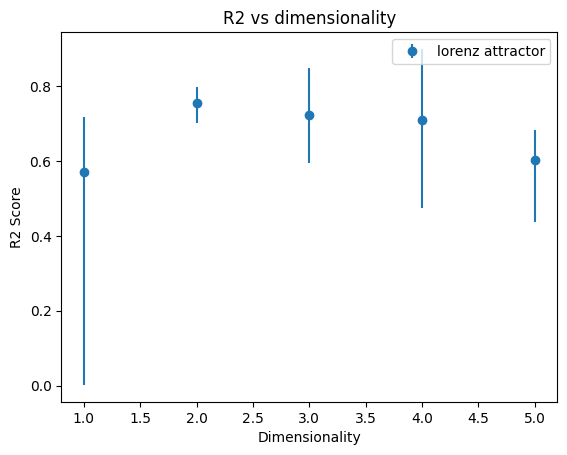

In [20]:
r2_sequence_l = dl.r2_vs_dimension(lorenz_input, dimensionality=[1,2,3,4,5], labels=['lorenz attractor'])